<a href="https://colab.research.google.com/github/Sai-Ankitha/My_Portofolio/blob/main/Mini1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/CWS_Project/CWS_DATASET'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/CWS_Project/CWS_DATASET'


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

dataset_path = '/content/drive/MyDrive/CWS_Project/CWS_DATASET'

img_height, img_width = 224, 224
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3682 files belonging to 2 classes.
Using 2946 files for training.
Found 3682 files belonging to 2 classes.
Using 736 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models

num_classes = 2  # Normal and Cotton Wool Spot

base_model = EfficientNetB4(input_shape=(224, 224, 3),
                            include_top=False,
                            weights='imagenet')

base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10  # You can increase this later
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 947s 10s/step - accuracy: 0.8862 - loss: 0.2820 - val_accuracy: 0.9579 - val_loss: 0.1399
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 864s 9s/step - accuracy: 0.9476 - loss: 0.1627 - val_accuracy: 0.9606 - val_loss: 0.1380
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 822s 9s/step - accuracy: 0.9485 - loss: 0.1544 - val_accuracy: 0.9620 - val_loss: 0.1157
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 844s 9s/step - accuracy: 0.9561 - loss: 0.1409 - val_accuracy: 0.9592 - val_loss: 0.1120
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 845s 9s/step - accuracy: 0.9585 - loss: 0.1256 - val_accuracy: 0.9606 - val_loss: 0.1220
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 848s 9s/step - accuracy: 0.9581 - loss: 0.1249 - val_accuracy: 0.9620 - val_loss: 0.1221
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 832s 9s/step - accuracy: 0.9518 - loss: 0.1546 - val_accuracy: 0.9524 - val_loss: 0.1239
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 843s 9s/step - accuracy: 0.9618 - loss: 0.1172 - val_accuracy: 0.9606 - 

In [ ]:
# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/CWS_Project/CWS_DATASET',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/My Drive/CWS_Project/CWS_DATASET',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

# ✅ Get class names BEFORE prefetching
class_names = train_ds.class_names

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Found 3682 files belonging to 2 classes.
Using 2946 files for training.
Found 3682 files belonging to 2 classes.
Using 736 files for validation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


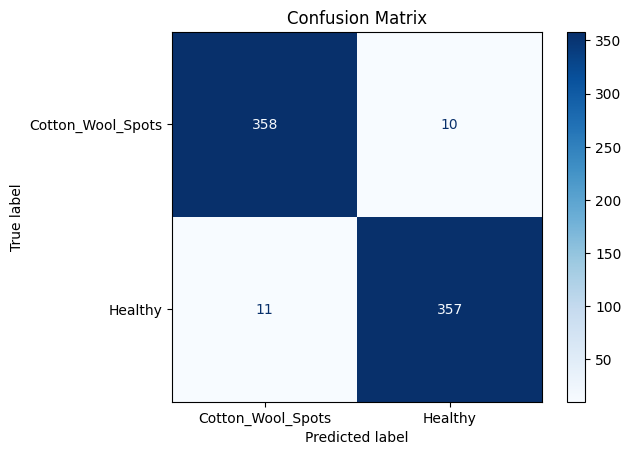

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predicted labels
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    predicted_labels = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes: Healthy and Cotton Wool Spots
])

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load base model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize as lists
y_true = []
y_probs = []

# Loop through validation data
for images, labels in val_ds:
    preds = model.predict(images)          # shape: (batch_size, 2)
    y_probs += list(preds[:, 1])           # convert to list, get class 1 probs
    y_true += list(labels.numpy())         # convert to list

# Convert to numpy arrays
y_true = np.array(y_true)
y_probs = np.array(y_probs)

# Compute ROC and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Cotton Wool Spot Detection')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 899s 9s/step - accuracy: 0.8687 - loss: 0.3087 - val_accuracy: 0.9592 - val_loss: 0.1380
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 852s 9s/step - accuracy: 0.9426 - loss: 0.1718 - val_accuracy: 0.9565 - val_loss: 0.1498
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 854s 9s/step - accuracy: 0.9319 - loss: 0.1747 - val_accuracy: 0.9389 - val_loss: 0.1736
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 861s 9s/step - accuracy: 0.9481 - loss: 0.1486 - val_accuracy: 0.9606 - val_loss: 0.1194
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 858s 9s/step - accuracy: 0.9582 - loss: 0.1387 - val_accuracy: 0.9565 - val_loss: 0.1270
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 842s 9s/step - accuracy: 0.9498 - loss: 0.1412 - val_accuracy: 0.9660 - val_loss: 0.1165
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 877s 9s/step - accuracy: 0.9560 - loss: 0.1412 - val_accuracy: 0.9579 - val_loss: 0.1150
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 842s 9s/step - accuracy: 0.9553 - loss: 0.1243 - val_accuracy: 0.9470 - v

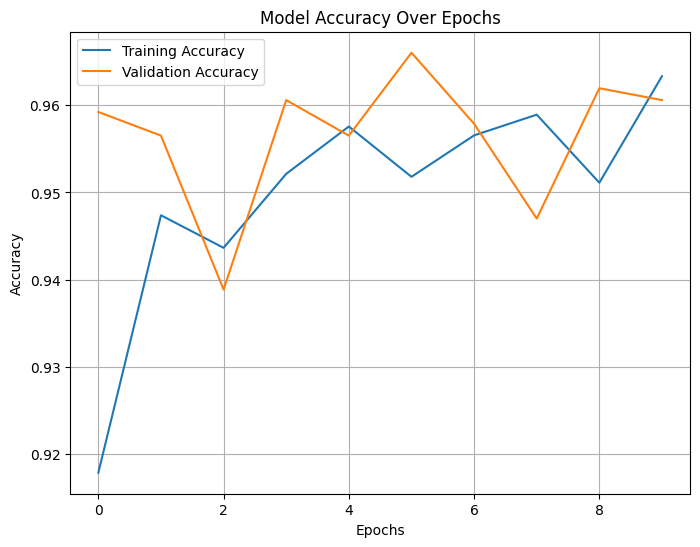

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and saved the history object
history = model.fit(train_ds, validation_data=val_ds, epochs=10)  # Example training

# Extract accuracy and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

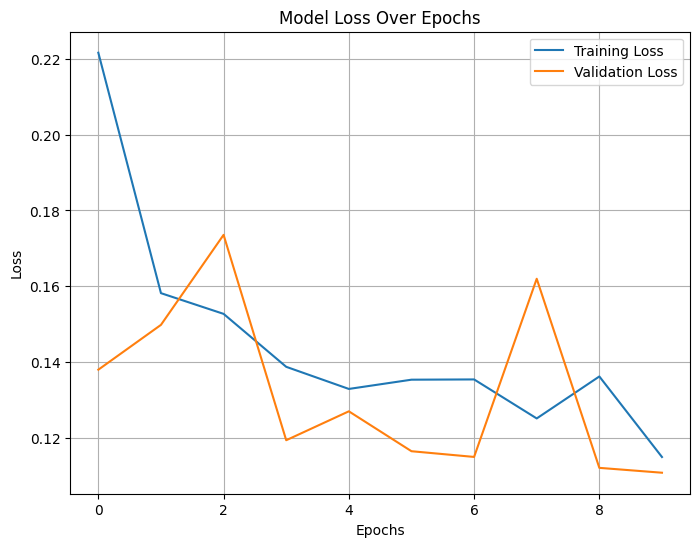

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and saved the history object
# history = model.fit(...)  ← This should already be done

# Extract loss and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss graph
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Adding labels and title
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    predicted_labels = (preds > 0.5).astype(int).flatten()  # Convert probabilities to 0 or 1

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

# Loop through validation dataset
for images, labels in val_ds:
    preds = model.predict(images)  # preds shape: (batch_size, 1) or (batch_size,)

    if preds.shape[-1] == 1:
        predicted_labels = (preds > 0.5).astype(int).reshape(-1)  # reshape to match shape
    else:
        predicted_labels = np.argmax(preds, axis=1)  # Use this only if using softmax

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Sanity check: Print lengths
print(f'y_true length: {len(y_true)}')
print(f'y_pred length: {len(y_pred)}')

# Generate classification report
from sklearn.metrics import classification_report

class_names = ['Healthy', 'Cotton_Wool_Spots']
report = classification_report(y_true, y_pred, target_names=class_names)

print("Classification Report:\n")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
y_true length: 736
y_pred length: 736
Classification Report:

                   precision    recall  f1-score   support

          Healthy       0.97      0.95      0.96

In [1]:
%pwd


'/content'

In [2]:
%cd /content
!mkdir Cottonwool_spots_detection
%cd Cottonwool_spots_detection


/content
/content/Cottonwool_spots_detection


In [3]:
!cp /content/YourNotebookName.ipynb /content/Cottonwool_spots_detection/


cp: cannot stat '/content/YourNotebookName.ipynb': No such file or directory


In [4]:
!git init
!git config user.name "Sai-Ankitha"
!git config user.email "saiankithapogula@gmail.com"
!git remote add origin https://github.com/Sai-Ankitha/Cottonwool_spots_detection.git


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/Cottonwool_spots_detection/.git/


In [5]:
!git add .
!git commit -m "Initial commit: Added Cotton Wool Spot Detection using Deep Learning"
!git branch -M main
!git push -u origin main


On branch master

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Sai-Ankitha/Cottonwool_spots_detection.git'


In [7]:
!ls /content


Cottonwool_spots_detection  sample_data
